In [36]:
import pandas as pd

In [37]:
Transactions = pd.read_csv('MavenMarket_Transactions_1998.csv')
Transactions.head()

,transaction_date,stock_date,product_id,customer_id,store_id,quantity
0,1/1/1998,12/25/1997,4,2439,10,3
1,1/1/1998,12/28/1997,11,4284,10,3
2,1/1/1998,12/28/1997,12,534,10,3
3,1/1/1998,12/29/1997,14,9743,10,2
4,1/1/1998,12/27/1997,16,3608,10,3


In [38]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182883 entries, 0 to 182882
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   transaction_date  182883 non-null  object
 1   stock_date        182883 non-null  object
 2   product_id        182883 non-null  int64 
 3   customer_id       182883 non-null  int64 
 4   store_id          182883 non-null  int64 
 5   quantity          182883 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 8.4+ MB


In [39]:
Transactions.isna().sum()

transaction_date    0
stock_date          0
product_id          0
customer_id         0
store_id            0
quantity            0
dtype: int64

In [40]:
Products = pd.read_csv('MavenMarket_Products.csv')
Products.head()

,product_id,product_brand,product_name,product_sku,product_retail_price,product_cost,product_weight,recyclable,low_fat
0,1,Washington,Washington Berry Juice,90748583674,2.85,0.94,8.39,NaN,NaN
1,2,Washington,Washington Mango Drink,96516502499,0.74,0.26,7.42,NaN,1.0
2,3,Washington,Washington Strawberry Drink,58427771925,0.83,0.40,13.10,1.0,1.0
3,4,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
4,5,Washington,Washington Diet Soda,85561191439,2.19,0.77,6.66,1.0,NaN


In [41]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1560 non-null   int64  
 1   product_brand         1560 non-null   object 
 2   product_name          1560 non-null   object 
 3   product_sku           1560 non-null   int64  
 4   product_retail_price  1560 non-null   float64
 5   product_cost          1560 non-null   float64
 6   product_weight        1560 non-null   float64
 7   recyclable            873 non-null    float64
 8   low_fat               552 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 109.8+ KB


In [42]:
Products.isna().sum()

product_id                 0
product_brand              0
product_name               0
product_sku                0
product_retail_price       0
product_cost               0
product_weight             0
recyclable               687
low_fat                 1008
dtype: int64

In [43]:
Products['recyclable'] = Products['recyclable'].fillna(0)
Products.isna().sum()

product_id                 0
product_brand              0
product_name               0
product_sku                0
product_retail_price       0
product_cost               0
product_weight             0
recyclable                 0
low_fat                 1008
dtype: int64

In [44]:
Products['low_fat'] = Products['low_fat'].fillna(0)
Products.isna().sum()

product_id              0
product_brand           0
product_name            0
product_sku             0
product_retail_price    0
product_cost            0
product_weight          0
recyclable              0
low_fat                 0
dtype: int64

In [45]:
Stores = pd.read_csv('MavenMarket_Stores.csv')
Stores.head()

,store_id,region_id,store_type,store_name,store_street_address,store_city,store_state,store_country,store_phone,first_opened_date,last_remodel_date,total_sqft,grocery_sqft
0,1,28,Supermarket,Store 1,2853 Bailey Rd,Acapulco,Guerrero,Mexico,262-555-5124,1/9/1982,12/5/1990,23593,17475
1,2,78,Small Grocery,Store 2,5203 Catanzaro Way,Bellingham,WA,USA,605-555-8203,4/2/1970,6/4/1973,28206,22271
2,3,76,Supermarket,Store 3,1501 Ramsey Circle,Bremerton,WA,USA,509-555-1596,6/14/1959,11/19/1967,39696,24390
3,4,27,Gourmet Supermarket,Store 4,433 St George Dr,Camacho,Zacatecas,Mexico,304-555-1474,9/27/1994,12/1/1995,23759,16844
4,5,4,Small Grocery,Store 5,1250 Coggins Drive,Guadalajara,Jalisco,Mexico,801-555-4324,9/18/1978,6/29/1991,24597,15012


In [46]:
Stores.isna().sum()

store_id                0
region_id               0
store_type              0
store_name              0
store_street_address    0
store_city              0
store_state             0
store_country           0
store_phone             0
first_opened_date       0
last_remodel_date       0
total_sqft              0
grocery_sqft            0
dtype: int64

In [47]:
Transactions_stores_products = Transactions.merge(Products, how = 'left', on = 'product_id').merge(Stores, how = 'left', on = 'store_id')
Transactions_stores_products.head()

,transaction_date,stock_date,product_id,customer_id,store_id,quantity,product_brand,product_name,product_sku,product_retail_price,...,store_name,store_street_address,store_city,store_state,store_country,store_phone,first_opened_date,last_remodel_date,total_sqft,grocery_sqft
0,1/1/1998,12/25/1997,4,2439,10,3,Washington,Washington Cream Soda,64412155747,3.64,...,Store 10,7894 Rotherham Dr,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354
1,1/1/1998,12/28/1997,11,4284,10,3,Washington,Washington Apple Drink,17074288725,3.51,...,Store 10,7894 Rotherham Dr,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354
2,1/1/1998,12/28/1997,12,534,10,3,Jeffers,Jeffers Oatmeal,49031038880,1.54,...,Store 10,7894 Rotherham Dr,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354
3,1/1/1998,12/29/1997,14,9743,10,2,Jeffers,Jeffers Wheat Puffs,92942813038,1.93,...,Store 10,7894 Rotherham Dr,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354
4,1/1/1998,12/27/1997,16,3608,10,3,Blue Label,Blue Label Canned Beets,62908702492,3.83,...,Store 10,7894 Rotherham Dr,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354


In [48]:
Transactions_stores_products['revenue'] = Transactions_stores_products['quantity'] * Transactions_stores_products['product_retail_price']
Transactions_stores_products.head()

,transaction_date,stock_date,product_id,customer_id,store_id,quantity,product_brand,product_name,product_sku,product_retail_price,...,store_street_address,store_city,store_state,store_country,store_phone,first_opened_date,last_remodel_date,total_sqft,grocery_sqft,revenue
0,1/1/1998,12/25/1997,4,2439,10,3,Washington,Washington Cream Soda,64412155747,3.64,...,7894 Rotherham Dr,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,10.92
1,1/1/1998,12/28/1997,11,4284,10,3,Washington,Washington Apple Drink,17074288725,3.51,...,7894 Rotherham Dr,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,10.53
2,1/1/1998,12/28/1997,12,534,10,3,Jeffers,Jeffers Oatmeal,49031038880,1.54,...,7894 Rotherham Dr,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,4.62
3,1/1/1998,12/29/1997,14,9743,10,2,Jeffers,Jeffers Wheat Puffs,92942813038,1.93,...,7894 Rotherham Dr,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,3.86
4,1/1/1998,12/27/1997,16,3608,10,3,Blue Label,Blue Label Canned Beets,62908702492,3.83,...,7894 Rotherham Dr,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,11.49


In [49]:
Transactions_stores_products['transaction_date'] = pd.to_datetime(Transactions_stores_products['transaction_date'])

Transactions_stores_products['transaction_month'] = Transactions_stores_products['transaction_date'].dt.month

Transactions_stores_products.head()



,transaction_date,stock_date,product_id,customer_id,store_id,quantity,product_brand,product_name,product_sku,product_retail_price,...,store_city,store_state,store_country,store_phone,first_opened_date,last_remodel_date,total_sqft,grocery_sqft,revenue,transaction_month
0,1998-01-01,12/25/1997,4,2439,10,3,Washington,Washington Cream Soda,64412155747,3.64,...,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,10.92,1
1,1998-01-01,12/28/1997,11,4284,10,3,Washington,Washington Apple Drink,17074288725,3.51,...,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,10.53,1
2,1998-01-01,12/28/1997,12,534,10,3,Jeffers,Jeffers Oatmeal,49031038880,1.54,...,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,4.62,1
3,1998-01-01,12/29/1997,14,9743,10,2,Jeffers,Jeffers Wheat Puffs,92942813038,1.93,...,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,3.86,1
4,1998-01-01,12/27/1997,16,3608,10,3,Blue Label,Blue Label Canned Beets,62908702492,3.83,...,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,11.49,1


In [50]:
Pivot_sum_of_revenue_by_country_per_month = Transactions_stores_products.pivot_table(index = 'store_country', columns = 'transaction_month', values = 'revenue', aggfunc = 'sum')
Pivot_sum_of_revenue_by_country_per_month.head()

transaction_month,1,2,3,4,5,6,7,8,9,10,11,12
store_country,,,,,,,,,,,,
Canada,7144.80,8332.66,8403.67,8484.02,9342.32,9858.66,10012.04,7907.02,9257.24,9037.66,10265.37,9628.88
Mexico,41619.36,38665.60,38304.45,37636.58,37893.74,38300.27,42433.70,38565.90,41706.45,37705.36,37462.18,48622.07
USA,49391.12,47499.74,51511.78,48655.54,47947.75,48891.11,46497.70,48245.59,50414.91,45692.89,66060.29,61909.89


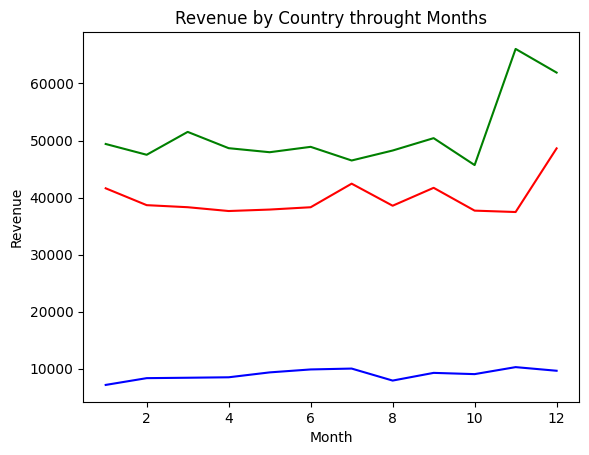

In [61]:
import matplotlib.pyplot as plt

filter1 = Transactions_stores_products['store_country'] == 'Mexico'
filter2 = Transactions_stores_products['store_country'] == 'USA'
filter3 = Transactions_stores_products['store_country'] == 'Canada'

# MEXICO
monthly_revenue1 = Transactions_stores_products[filter1].groupby('transaction_month')['revenue'].sum()


monthly_revenue1 = monthly_revenue1.sort_index()

x1 = monthly_revenue1.index
y1 = monthly_revenue1.values

# USA
monthly_revenue2 = Transactions_stores_products[filter2].groupby('transaction_month')['revenue'].sum()


monthly_revenue2 = monthly_revenue2.sort_index()

x2 = monthly_revenue2.index
y2 = monthly_revenue2.values

# CANADA
monthly_revenue3 = Transactions_stores_products[filter3].groupby('transaction_month')['revenue'].sum()


monthly_revenue3 = monthly_revenue3.sort_index()

x3 = monthly_revenue3.index
y3 = monthly_revenue3.values

plt.plot(x1,y1,label = 'prva linija',color = 'red')
plt.plot(x2,y2,label = 'druga linija',color = 'green')
plt.plot(x3,y3,label = 'druga linija',color = 'blue')

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Country throught Months')
plt.show()

In [66]:
Transactions_stores_products.head()

,transaction_date,stock_date,product_id,customer_id,store_id,quantity,product_brand,product_name,product_sku,product_retail_price,...,store_city,store_state,store_country,store_phone,first_opened_date,last_remodel_date,total_sqft,grocery_sqft,revenue,transaction_month
0,1998-01-01,12/25/1997,4,2439,10,3,Washington,Washington Cream Soda,64412155747,3.64,...,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,10.92,1
1,1998-01-01,12/28/1997,11,4284,10,3,Washington,Washington Apple Drink,17074288725,3.51,...,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,10.53,1
2,1998-01-01,12/28/1997,12,534,10,3,Jeffers,Jeffers Oatmeal,49031038880,1.54,...,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,4.62,1
3,1998-01-01,12/29/1997,14,9743,10,2,Jeffers,Jeffers Wheat Puffs,92942813038,1.93,...,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,3.86,1
4,1998-01-01,12/27/1997,16,3608,10,3,Blue Label,Blue Label Canned Beets,62908702492,3.83,...,Orizaba,Veracruz,Mexico,212-555-4774,4/13/1979,1/30/1982,34791,26354,11.49,1


In [75]:
Group_by_store_id = Transactions_stores_products.groupby('store_id')['revenue'].sum()
Group_by_store_id = Group_by_store_id.sort_values(ascending=False)
Group_by_store_id

store_id
12    87623.61
8     87253.65
19    85262.31
13    83180.66
17    82851.94
21    81492.24
15    63337.39
16    60850.70
11    60275.83
3     57981.58
10    57835.36
24    56947.32
7     56766.26
1     56396.78
4     54865.49
6     52364.54
9     25371.42
23    23247.55
18    23173.91
20    22412.03
22     5250.88
5      4903.20
14     4883.76
2      4779.90
Name: revenue, dtype: float64

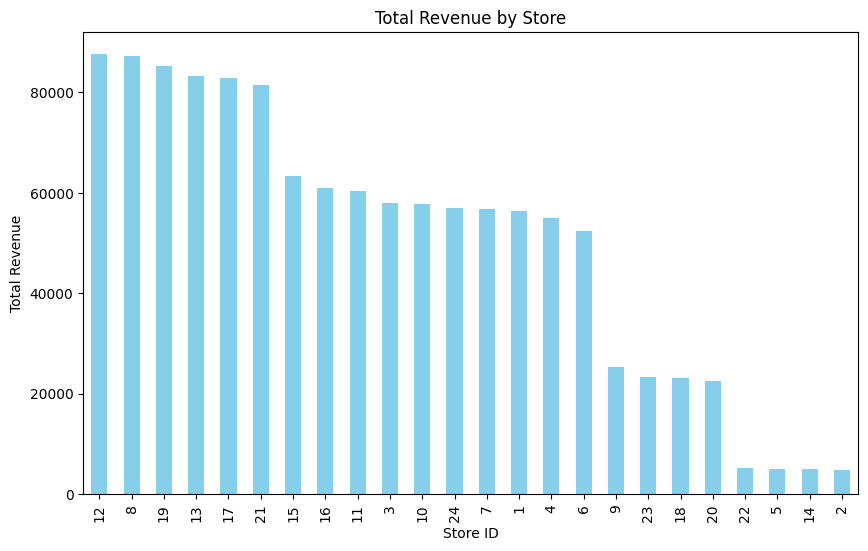

In [76]:
Group_by_store_id.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Store ID')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Store')
plt.show()

In [77]:
Group_by_store_product_brand = Transactions_stores_products.groupby('product_brand')['revenue'].sum()
Group_by_store_product_brand = Group_by_store_product_brand.sort_values(ascending=False)
Group_by_store_product_brand

product_brand
Hermanos     37092.95
Tell Tale    34423.30
Ebony        34028.95
Tri-State    33917.62
High Top     32785.20
               ...   
Dual City      782.26
Big City       725.75
Symphony       574.40
Toretti        427.13
King           282.15
Name: revenue, Length: 111, dtype: float64

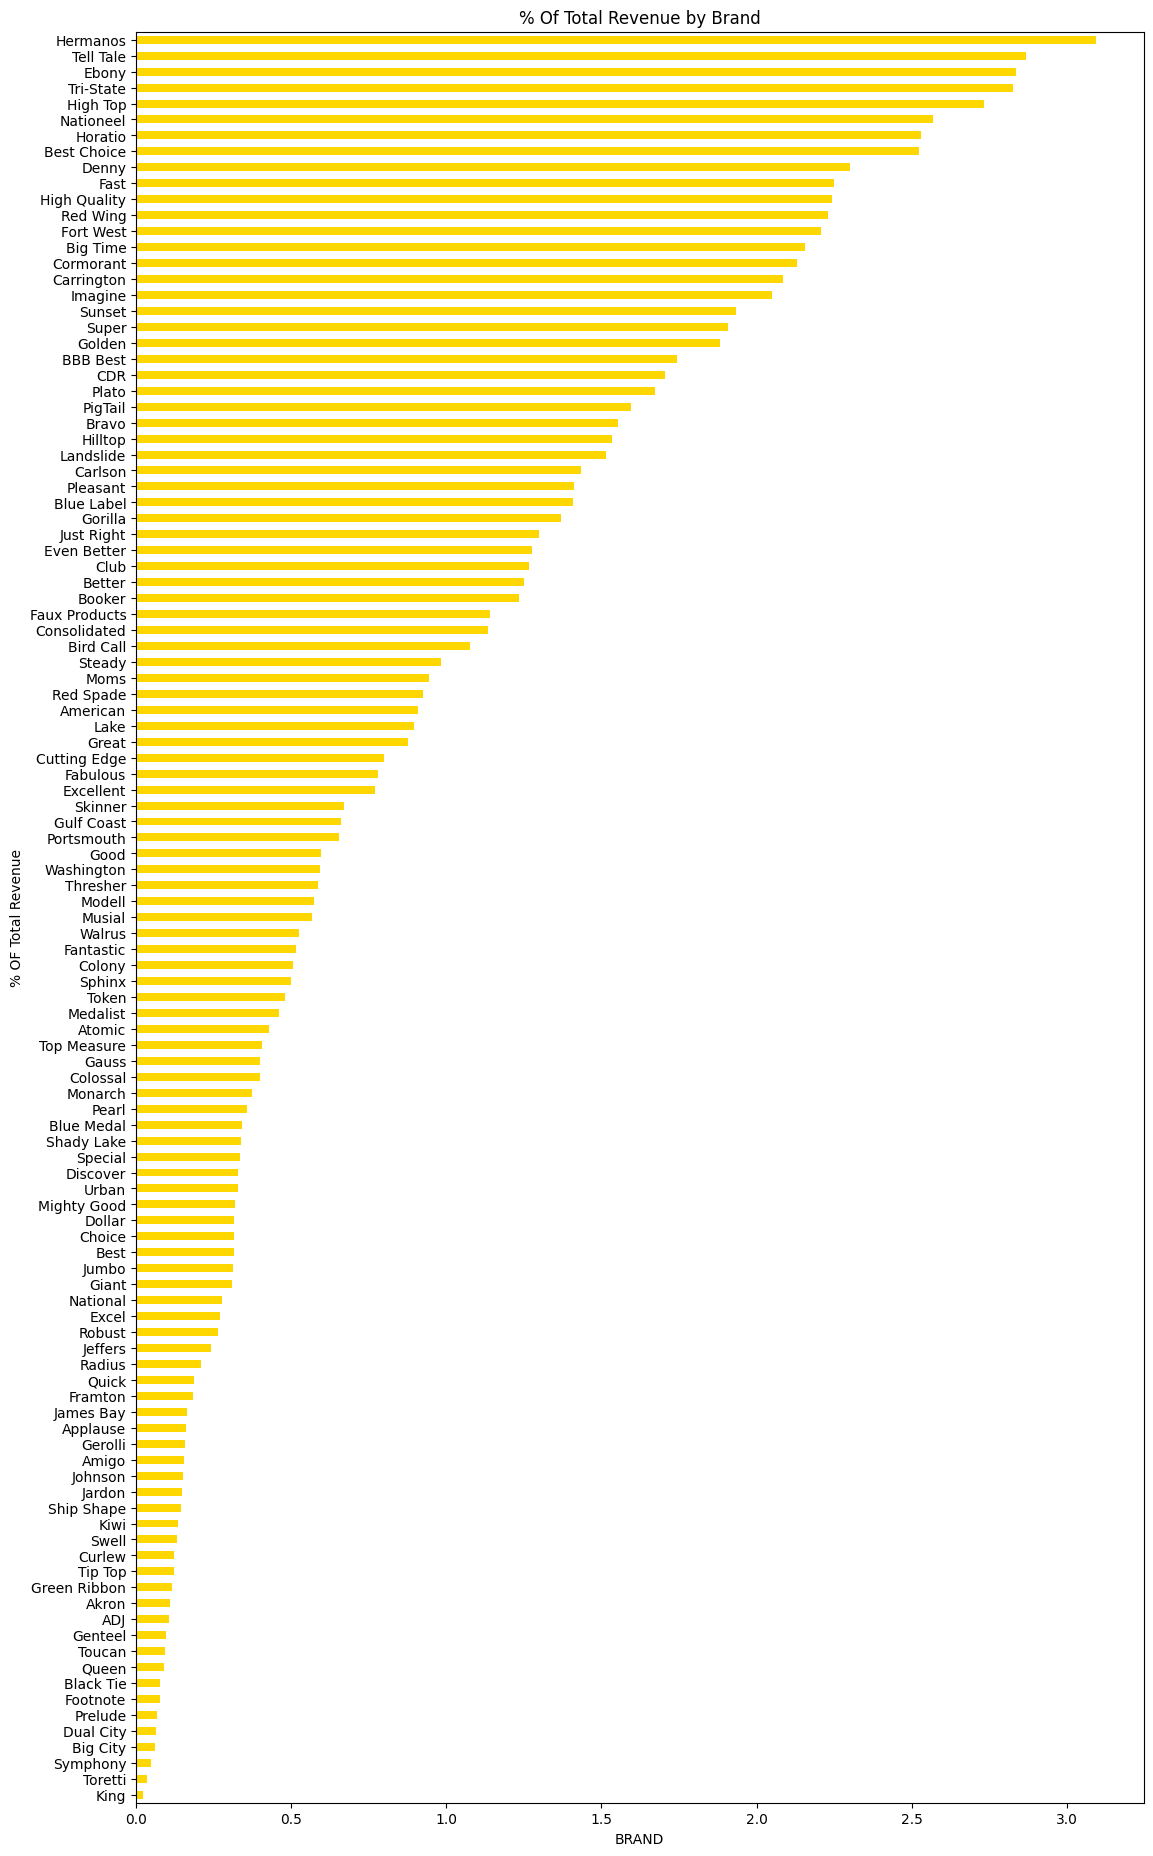

In [92]:
Group_by_store_product_brand_percentage = Group_by_store_product_brand / Group_by_store_product_brand.sum() * 100
Group_by_store_product_brand_percentage = Group_by_store_product_brand_percentage.sort_values(ascending=True)
Group_by_store_product_brand_percentage.plot(kind='barh', figsize=(13, 23), color='gold')
plt.xlabel('BRAND')
plt.ylabel('% OF Total Revenue')
plt.title('% Of Total Revenue by Brand')
plt.show()

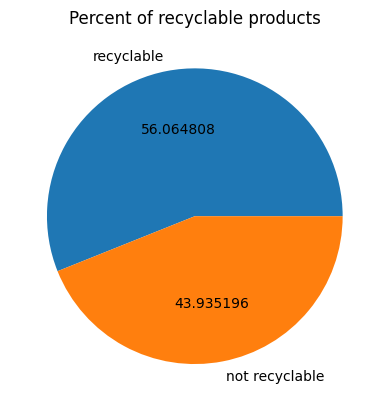

In [96]:
Count_OF_recylable = Transactions_stores_products['recyclable'].value_counts()
plt.pie(Count_OF_recylable, labels = ['recyclable', 'not recyclable'], autopct = '%2f')
plt.title('Percent of recyclable products')
plt.show()